"""
This script is used to analyze data used in Figures 2CDE, 3ABC,  and  S3 of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM

""";

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
import re

In [3]:
strains=["pBGT","MGGT","G54U","G55U","pBGT+SB"]

In [4]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"
rootDir=rootDir+"pBGT/GIT/"

dataPath=rootDir+"data/analysis/LB-AMP-LB/"
outdataPath=rootDir+"data/LB-AMP-LB/"

files=os.listdir(dataPath)

files.sort()
files

['G54U', 'G55U', 'MGGT', 'pBGT', 'pBGT+SB']

# pBGT

In [5]:
strain="pBGT"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()

pBGT_df=[]
for season in seasons:
    if("reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]

    for well in wells:
        file_name=season_dir+well
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)
        rep_name=""
        if("A" in well):
            rep_name="rep-1"
        elif("B" in well):
            rep_name="rep-2"
        elif("F" in well):
            rep_name="rep-3"
        dose_name=re.split("\D",well)[1]


        dose_list=[dose_name]*this_size
        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list,"dose number":dose_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    pBGT_df.append(season_df)
pBGT_df=pd.concat(pBGT_df)
pBGT_df.head()

day-1-LB-reread  nope
day-3-LB-reread  nope


,Object Number,Area_M01,Area_M02,Area_M04,Aspect Ratio_M01,Aspect Ratio_M02,Aspect Ratio_M04,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Gradient RMS_M04_Ch04,Intensity_MC_Ch02,strain,season,treatment,replicate,dose number
0,0,3.666667,7.777778,4.333333,0.718028,0.791963,0.787808,42.379388,44.115431,46.022834,12642.500000,pBGT,1,LB,rep-1,02
1,1,4.333333,10.000000,5.666667,0.787808,0.826160,0.838422,40.785294,42.450941,42.158897,17923.286290,pBGT,1,LB,rep-1,02
2,2,0.000000,6.777778,0.000000,0.000000,0.699107,0.000000,0.000000,44.493035,0.000000,1128.275862,pBGT,1,LB,rep-1,02
3,3,8.333333,16.888889,9.222222,0.498554,0.639711,0.575093,39.600354,40.854162,41.383327,35697.776316,pBGT,1,LB,rep-1,02
4,4,10.444444,22.555556,5.555556,0.618548,0.647448,0.630423,27.314279,28.427073,21.307215,40934.323529,pBGT,1,LB,rep-1,02


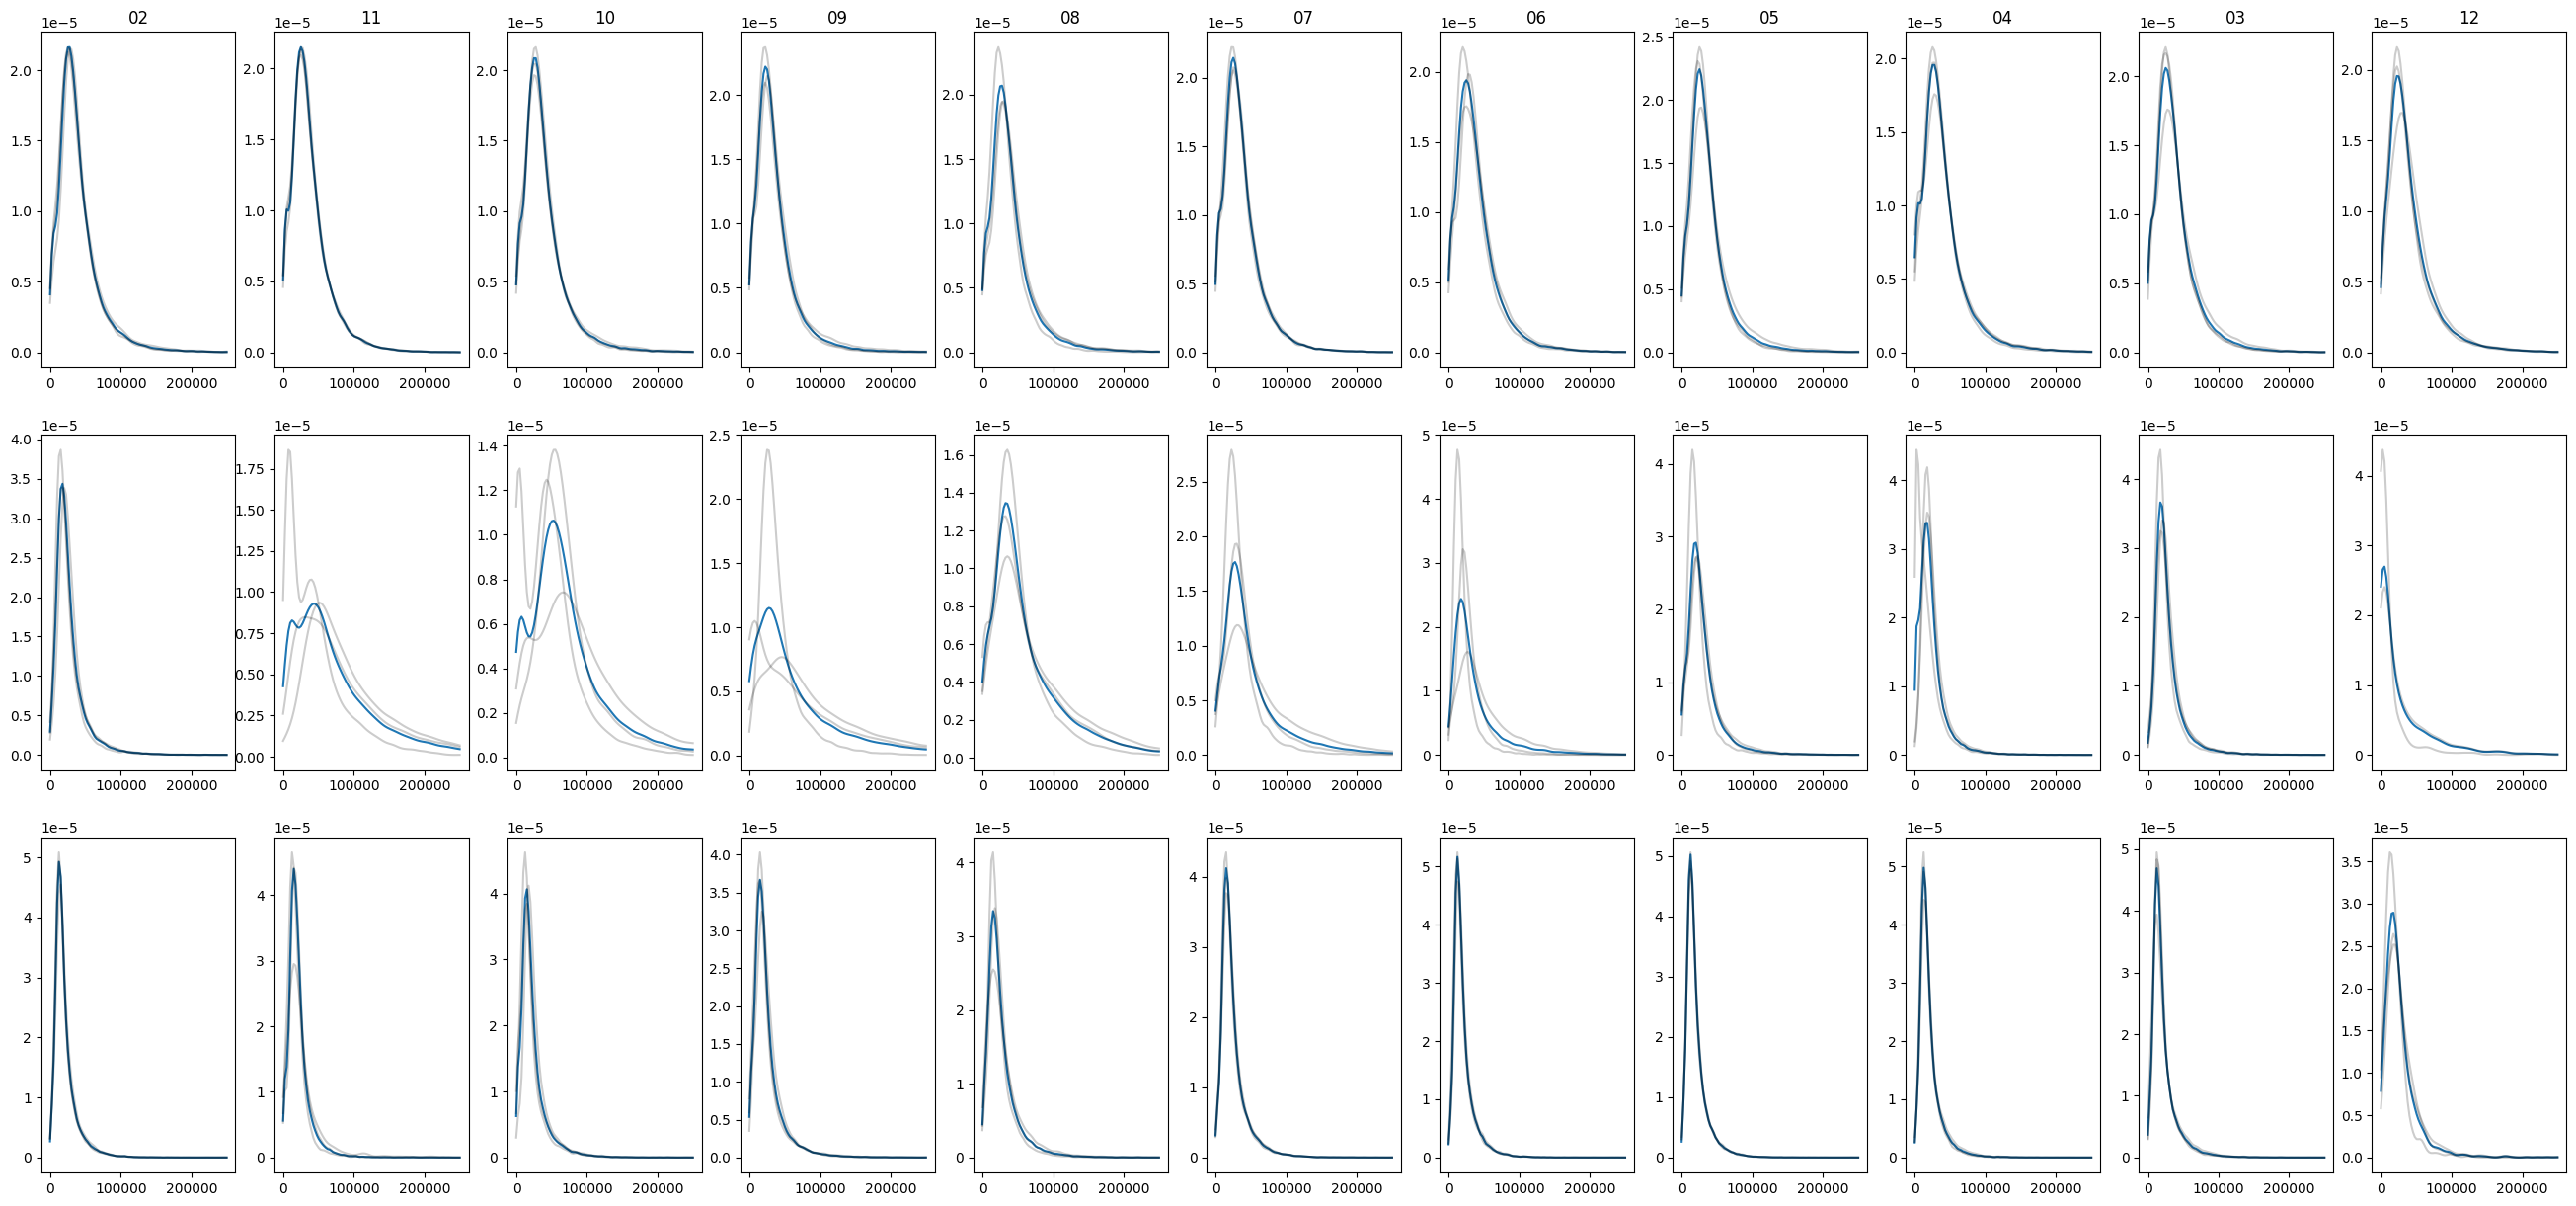

In [6]:
cols=pBGT_df["dose number"].unique()
rows=pBGT_df["season"].unique()
ncols=len(cols)
nrows=len(rows)

this_g=pBGT_df["Intensity_MC_Ch02"]
maxg=this_g.max()
ming=this_g.min()
maxg=250000


xs=np.linspace(ming,maxg,100)

fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*5))
for ic,col in enumerate(cols):
    col_df=pBGT_df[pBGT_df["dose number"]==col]
    ax[0,ic].set_title(col)
    for ir,row in enumerate(rows):
        row_df=col_df[col_df["season"]==row]
        this_gs=row_df["Intensity_MC_Ch02"]
        den=gaussian_kde(this_gs)
        ys=den(xs)
        ax[ir,ic].plot(xs,ys)
        reps=row_df["replicate"].unique()
        for rep in reps:
            t_df=row_df[row_df["replicate"]==rep]
            this_gs=t_df["Intensity_MC_Ch02"]
            den=gaussian_kde(this_gs)
            ys=den(xs)
            ax[ir,ic].plot(xs,ys,c='k',alpha=.2)
plt.show()

# pBGT reread data

In [7]:
strain="pBGT"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()

pBGT_df2=[]
for season in seasons:
    if(not "reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    wells.sort()
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]

    for well in wells:
        file_name=season_dir+well
        #print(file_name)
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)
        rep_name=""
        if("A" in well):
            rep_name="rep-1"
        elif("B" in well):
            rep_name="rep-2"
        elif("F" in well):
            rep_name="rep-3"
        dose_name=re.split("\D",well)[1]


        dose_list=[dose_name]*this_size
        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list,"dose number":dose_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    pBGT_df2.append(season_df)
pBGT_df2=pd.concat(pBGT_df2)
pBGT_df2.head()

day-1-LB  nope
day-2-AMP  nope
day-3-LB  nope


,Object Number,Area_M01,Area_M02,Area_M04,Aspect Ratio_M01,Aspect Ratio_M02,Aspect Ratio_M04,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Gradient RMS_M04_Ch04,Intensity_MC_Ch02,strain,season,treatment,replicate,dose number
0,0,5.111111,12.888889,7.888889,0.587880,0.654149,0.703282,36.155203,39.145853,37.481128,18949.927419,pBGT,1,LB,rep-1,02
1,1,4.888889,10.555556,6.000000,0.802697,0.836098,0.756472,44.959663,46.114739,45.835153,23263.274194,pBGT,1,LB,rep-1,02
2,2,0.000000,4.222222,0.000000,0.000000,0.859440,0.000000,0.000000,50.937078,0.000000,1154.468750,pBGT,1,LB,rep-1,02
3,3,0.000000,9.333333,0.000000,0.000000,0.813391,0.000000,0.000000,44.320730,0.000000,6616.846154,pBGT,1,LB,rep-1,02
4,4,11.666667,19.333333,13.666667,0.521367,0.598041,0.534045,35.950811,36.707599,36.845196,52717.071429,pBGT,1,LB,rep-1,02


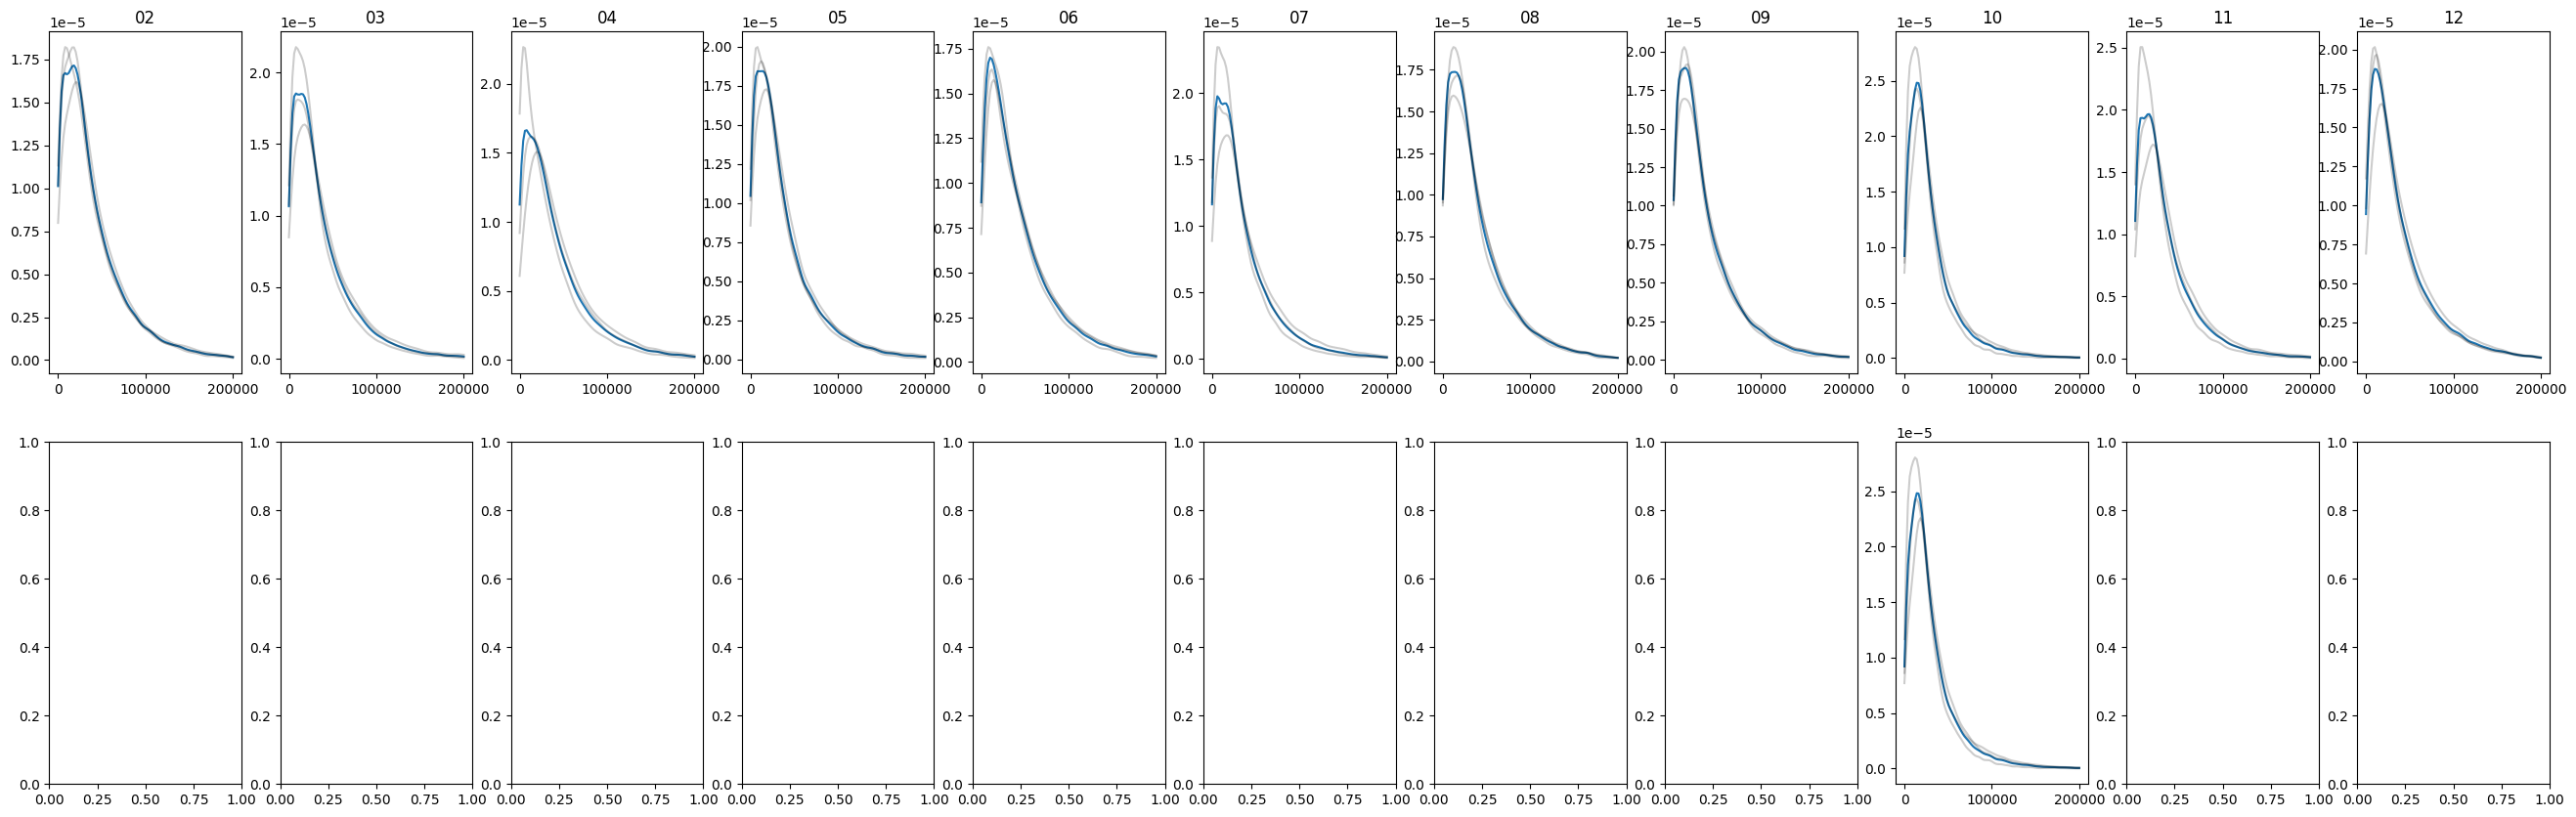

In [8]:
cols=pBGT_df2["dose number"].unique()
rows=pBGT_df2["season"].unique()
ncols=len(cols)
nrows=len(rows)

this_g=pBGT_df2["Intensity_MC_Ch02"]
maxg=this_g.max()
ming=this_g.min()
maxg=200000


xs=np.linspace(ming,maxg,100)

fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*5))
for ic,col in enumerate(cols):
    col_df=pBGT_df2[pBGT_df2["dose number"]==col]
    ax[0,ic].set_title(col)
    for ir,row in enumerate(rows):
        row_df=col_df[col_df["season"]==row]
        this_gs=row_df["Intensity_MC_Ch02"] #.dropna()
        this_gs=this_gs.dropna()
        tx=this_gs[this_gs.isna()]

        if(len(this_gs)==0):
            continue

        den=gaussian_kde(this_gs)
        ys=den(xs)
        ax[ir,ic].plot(xs,ys)
        reps=row_df["replicate"].unique()
        for rep in reps:
            t_df=row_df[row_df["replicate"]==rep]
            this_gs=t_df["Intensity_MC_Ch02"]
            this_gs=this_gs.dropna()
            den=gaussian_kde(this_gs)
            ys=den(xs)
            ax[ir,ic].plot(xs,ys,c='k',alpha=.2)
plt.show()

# MGGT

In [9]:
strain="MGGT"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()
print(seasons)

MGGT_df=[]
for season in seasons:

    if("reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    wells.sort()
    print(wells)
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]
    print(snum,treatment)
    for well in wells:
        file_name=season_dir+well
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)

        if("A" in well):
            rep_name="rep-1"
        elif("B" in well):
            rep_name="rep-2"
        elif("C" in well):
            rep_name="rep-3"
        dose_name=re.split("\D",well)[1]


        dose_list=[dose_name]*this_size
        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list,"dose number":dose_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    MGGT_df.append(season_df)
MGGT_df=pd.concat(MGGT_df)
MGGT_df.head()

['day-1-LB', 'day-2-AMP', 'day-3-LB']
['A02.txt', 'A03.txt', 'A04.txt', 'A05.txt', 'A07.txt', 'A08.txt', 'A09.txt', 'A10.txt', 'A11.txt', 'A12.txt', 'B02.txt', 'B03.txt', 'B04.txt', 'B05.txt', 'B06.txt', 'B07.txt', 'B08.txt', 'B09.txt', 'B10.txt', 'B11.txt', 'B12.txt', 'C02.txt', 'C03.txt', 'C04.txt', 'C05.txt', 'C06.txt', 'C07.txt', 'C08.txt', 'C09.txt', 'C10.txt', 'C11.txt', 'C12.txt']
1 LB
['A02.txt', 'A03.txt', 'A04.txt', 'A05.txt', 'A06.txt', 'A07.txt', 'A08.txt', 'A09.txt', 'A10.txt', 'A11.txt', 'B02.txt', 'B03.txt', 'B04.txt', 'B05.txt', 'B07.txt', 'B08.txt', 'B09.txt', 'B10.txt', 'B11.txt', 'C02.txt', 'C03.txt', 'C04.txt', 'C05.txt', 'C06.txt', 'C07.txt', 'C08.txt', 'C09.txt', 'C10.txt', 'C11.txt']
2 AMP
['A10.txt', 'B10.txt', 'C10.txt']
3 LB


,Object Number,Area_M01,Area_M02,Area_M04,Aspect Ratio_M01,Aspect Ratio_M02,Aspect Ratio_M04,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Gradient RMS_M04_Ch04,Intensity_MC_Ch02,strain,season,treatment,replicate,dose number
0,0,0.0,55.222222,0.0,0.0,0.502838,0.0,0.0,20.293874,0.0,3574.465116,MGGT,1,LB,rep-1,02
1,1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,43.690217,MGGT,1,LB,rep-1,02
2,2,0.0,16.888889,0.0,0.0,0.698250,0.0,0.0,19.941072,0.0,1112.717391,MGGT,1,LB,rep-1,02
3,3,0.0,5.444444,0.0,0.0,0.664979,0.0,0.0,37.844659,0.0,569.486111,MGGT,1,LB,rep-1,02
4,4,0.0,14.666667,0.0,0.0,0.677321,0.0,0.0,28.464187,0.0,1919.706897,MGGT,1,LB,rep-1,02


['02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
['1' '2' '3']


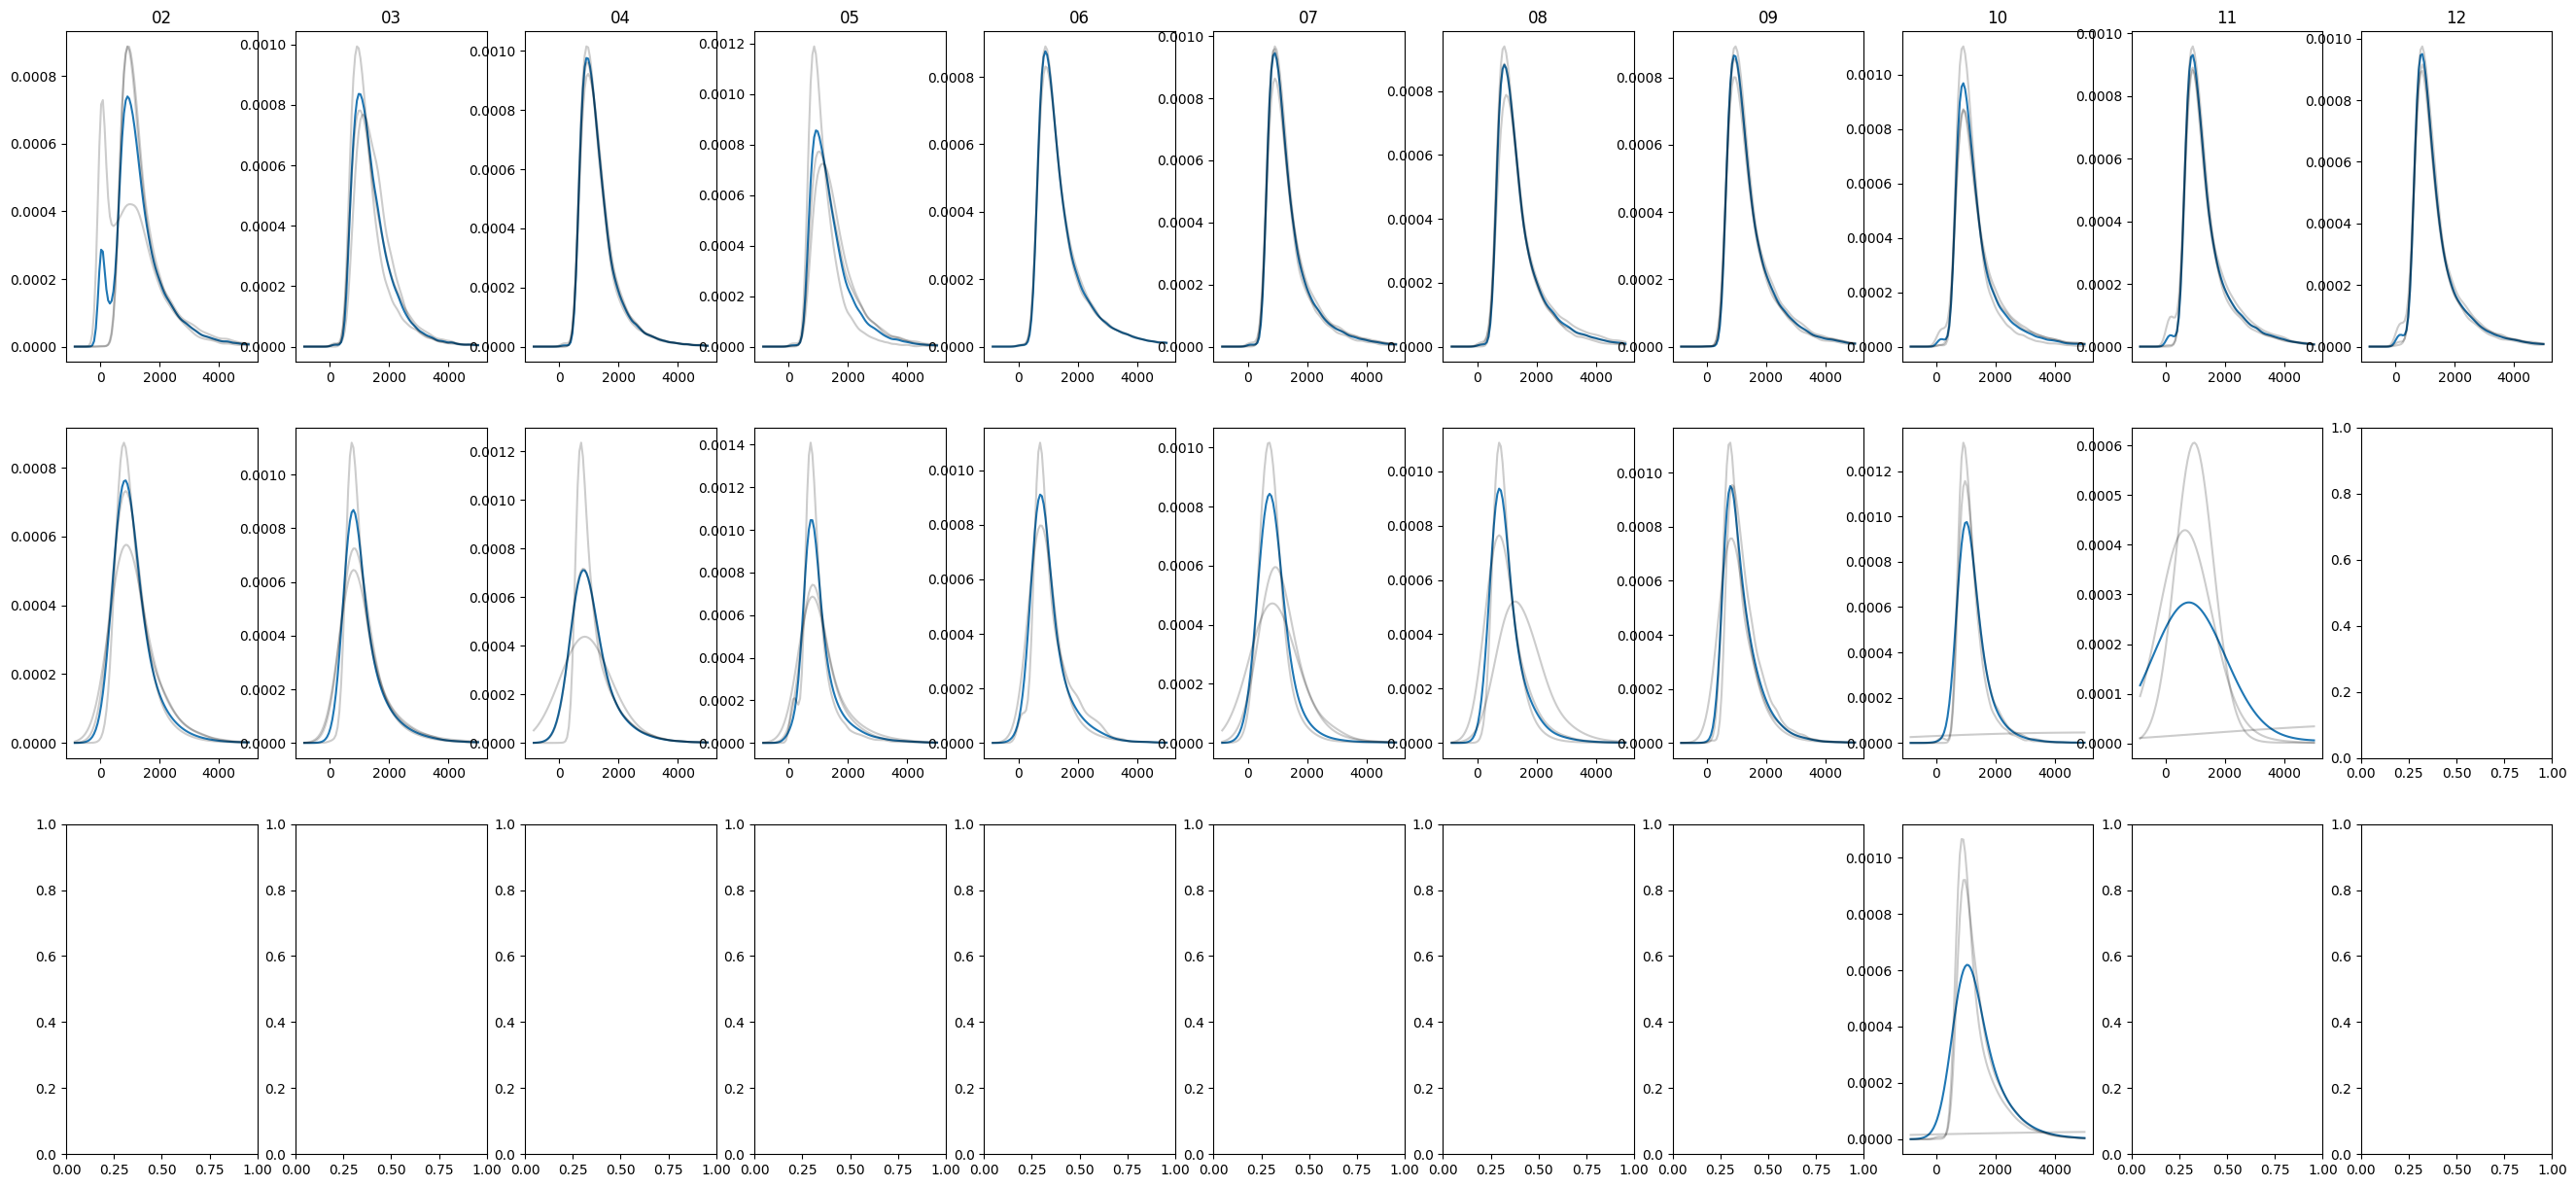

In [10]:
cols=MGGT_df["dose number"].unique()
cols.sort()
rows=MGGT_df["season"].unique()
print(cols)
print(rows)

ncols=len(cols)
nrows=len(rows)

this_g=MGGT_df["Intensity_MC_Ch02"]
maxg=this_g.max()
ming=this_g.min()
maxg=5000


xs=np.linspace(ming,maxg,100)

fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*5))
for ic,col in enumerate(cols):
    col_df=MGGT_df[MGGT_df["dose number"]==col]
    ax[0,ic].set_title(col)
    for ir,row in enumerate(rows):
        row_df=col_df[col_df["season"]==row]
        this_gs=row_df["Intensity_MC_Ch02"]
        if(len(this_gs)==0):
            continue
        den=gaussian_kde(this_gs)
        ys=den(xs)
        ax[ir,ic].plot(xs,ys)
        reps=row_df["replicate"].unique()
        for rep in reps:
            t_df=row_df[row_df["replicate"]==rep]
            this_gs=t_df["Intensity_MC_Ch02"]
            den=gaussian_kde(this_gs)
            ys=den(xs)
            ax[ir,ic].plot(xs,ys,c='k',alpha=.2)
plt.show()

# pBGT+SB

In [11]:
strain="pBGT+SB"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()

pBGTSB_df=[]
for season in seasons:
    if("reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    wells.sort()
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]

    for well in wells:
        file_name=season_dir+well
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)
        rep_name="x"
        if("E01" in well):
            rep_name="Control"
        elif("C02" in well):
            rep_name="rep-1"
        elif("C04" in well):
            rep_name="rep-2"
        elif("D01" in well):
            rep_name="rep-3"
        elif("D04" in well):
            rep_name="rep-4"




        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    pBGTSB_df.append(season_df)
pBGTSB_df=pd.concat(pBGTSB_df)
pBGTSB_df.tail()

,Object Number,Area_M01,Area_M02,Aspect Ratio_M01,Aspect Ratio_M02,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Intensity_MC_Ch02,Intensity_MC_Ch04,strain,season,treatment,replicate
24995,24995,25.777778,27.666667,0.783947,0.795982,58.188383,25.023088,20025.906250,699.554688,pBGT+SB,3,LB,Control
24996,24996,29.111111,30.333333,0.843724,0.802411,58.115393,22.636315,26280.562500,923.734375,pBGT+SB,3,LB,Control
24997,24997,26.111111,42.222222,0.821048,0.955344,62.718187,20.991192,18850.140625,629.394531,pBGT+SB,3,LB,Control
24998,24998,24.888889,43.555556,0.762970,0.988073,59.224474,24.356598,20921.019737,940.052632,pBGT+SB,3,LB,Control
24999,24999,46.777778,61.888889,0.753154,0.956796,60.435882,21.987017,28646.550000,1273.946875,pBGT+SB,3,LB,Control


# G54U

In [12]:
strain="G54U"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()

g54_df=[]
for season in seasons:
    if("reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    wells.sort()
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]

    for well in wells:
        file_name=season_dir+well
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)
        rep_name="x"
        if("b06" in well):
            rep_name="Control"
        elif("e05" in well):
            rep_name="rep-1"
        elif("e07" in well):
            rep_name="rep-2"
        elif("d06" in well):
            rep_name="rep-3"
        elif("d08" in well):
            rep_name="rep-4"




        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    g54_df.append(season_df)
g54_df=pd.concat(g54_df)
g54_df.tail()

,Object Number,Area_M01,Area_M02,Aspect Ratio_M01,Aspect Ratio_M02,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Intensity_MC_Ch01,Intensity_MC_Ch02,strain,season,treatment,replicate
19995,19995,16.111111,14.444444,0.620260,0.661495,70.200903,40.274384,1268.137931,52246.724138,G54U,3,LB,rep-2
19996,19996,17.777778,16.444444,0.633651,0.661554,68.126445,38.411902,1646.824219,67653.531250,G54U,3,LB,rep-2
19997,19997,23.111111,19.888889,0.647991,0.661321,68.560860,37.367282,2436.107143,98778.101562,G54U,3,LB,rep-2
19998,19998,16.333333,17.000000,0.656373,0.684703,68.583966,41.004374,1823.234375,74107.328125,G54U,3,LB,rep-2
19999,19999,29.333333,23.888889,0.490526,0.491057,68.484517,39.013400,3277.385714,122225.557143,G54U,3,LB,rep-2


# G55U

In [13]:
strain="G55U"
strain_dir=dataPath+strain+"/"
seasons=os.listdir(strain_dir)
seasons.sort()

g55_df=[]
for season in seasons:
    if("reread" in season):
        print(season," nope")
        continue
    season_dir=strain_dir+season+"/data_text/"
    wells=os.listdir(season_dir)
    wells.sort()
    season_df=[]
    season_split=season.split("-")
    snum=season_split[1]
    treatment=season_split[2]

    for well in wells:
        file_name=season_dir+well
        this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        #this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP'}, inplace=True)

        ids=list(this_df["Object Number"])
        this_size=len(ids)
        rep_name="x"
        if("b10" in well):
            rep_name="Control"
        elif("e09" in well):
            rep_name="rep-1"
        elif("e11" in well):
            rep_name="rep-2"
        elif("g11" in well):
            rep_name="rep-3"
        elif("d12" in well):
            rep_name="rep-4"




        rep_list=[rep_name]*this_size
        season_num=[snum]*this_size
        treatment_list=[treatment]*this_size
        strainname_list=[strain]*this_size

        df_temp=pd.DataFrame({"Object Number":ids,"strain":strainname_list,"season":season_num,"treatment":treatment_list,"replicate":rep_list})

        df=pd.merge(this_df,df_temp, on=["Object Number"])


        season_df.append(df)
    season_df=pd.concat(season_df)
    g55_df.append(season_df)
g55_df=pd.concat(g55_df)
g55_df.tail()

,Object Number,Area_M01,Area_M02,Aspect Ratio_M01,Aspect Ratio_M02,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Intensity_MC_Ch01,Intensity_MC_Ch02,strain,season,treatment,replicate
19995,19995,11.777778,8.222222,0.788854,0.824538,72.182954,46.256607,-71.789474,4040.546053,G55U,3,LB,rep-3
19996,19996,22.333333,13.111111,0.616068,0.526697,72.138183,40.642001,1065.660714,36677.446429,G55U,3,LB,rep-3
19997,19997,18.000000,18.444444,0.549484,0.604069,70.924738,40.379252,1564.020833,54311.516667,G55U,3,LB,rep-3
19998,19998,26.222222,11.000000,0.715857,0.651631,66.437814,43.069128,179.371212,23022.833333,G55U,3,LB,rep-3
19999,19999,12.888889,12.222222,0.783391,0.820500,69.092970,45.335198,1002.844828,41051.741379,G55U,3,LB,rep-3


# Saving dataframes

In [ ]:
pBGT_df.to_csv(outdataPath+"pBGT_LB-AMP-LB_AMNIS.csv",sep="\t",index=False)
pBGT_df2.to_csv(outdataPath+"pBGT_LB-AMP-LB_AMNIS_reread.csv",sep="\t",index=False)
pBGTSB_df.to_csv(outdataPath+"pBGT+Sulbactam_LB-AMP-LB_AMNIS.csv",sep="\t",index=False)
MGGT_df.to_csv(outdataPath+"MGGT_LB-AMP-LB_AMNIS.csv",sep="\t",index=False)
g54_df.to_csv(outdataPath+"G54U_LB-AMP-LB_AMNIS.csv",sep="\t",index=False)
g55_df.to_csv(outdataPath+"G55U_LB-AMP-LB_AMNIS.csv",sep="\t",index=False)

In [14]:
outdataPath

'/content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/LB-AMP-LB/'